In [98]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from tensorflow.keras.regularizers import l2
from tqdm import tqdm
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('data/weatherstats_vancouver_hourly_clean.csv')
df.head()

,date_time_local,pressure_station,pressure_sea,wind_dir,wind_speed,wind_gust,relative_humidity,dew_point,temperature,windchill,humidex,visibility,health_index,cloud_okta,max_air_temp_pst1hr,min_air_temp_pst1hr
0,2013-07-01 00:00:00,101.18,101.16,SSE,7,0.0,91,18.2,19.7,0.0,0.0,32200.0,2.9,5.0,19.4,18.5
1,2013-07-01 01:00:00,101.22,101.21,SE,6,0.0,89,17.8,19.6,0.0,0.0,32200.0,3.0,5.0,20.1,18.7
2,2013-07-01 02:00:00,101.26,101.24,E,11,0.0,88,16.7,18.7,0.0,0.0,32200.0,3.0,5.0,19.8,18.0
3,2013-07-01 03:00:00,101.26,101.25,E,4,0.0,84,16.5,19.2,0.0,0.0,32200.0,2.7,5.0,18.5,17.5
4,2013-07-01 04:00:00,101.30,101.28,NNW,5,0.0,87,15.7,17.9,0.0,0.0,32200.0,2.6,5.0,18.8,17.3


In [61]:
df['date_time_local'] = pd.to_datetime(df['date_time_local'], utc=False)
df = df.set_index('date_time_local')
df.head()

,pressure_station,pressure_sea,wind_dir,wind_speed,wind_gust,relative_humidity,dew_point,temperature,windchill,humidex,visibility,health_index,cloud_okta,max_air_temp_pst1hr,min_air_temp_pst1hr
date_time_local,,,,,,,,,,,,,,,
2013-07-01 00:00:00,101.18,101.16,SSE,7,0.0,91,18.2,19.7,0.0,0.0,32200.0,2.9,5.0,19.4,18.5
2013-07-01 01:00:00,101.22,101.21,SE,6,0.0,89,17.8,19.6,0.0,0.0,32200.0,3.0,5.0,20.1,18.7
2013-07-01 02:00:00,101.26,101.24,E,11,0.0,88,16.7,18.7,0.0,0.0,32200.0,3.0,5.0,19.8,18.0
2013-07-01 03:00:00,101.26,101.25,E,4,0.0,84,16.5,19.2,0.0,0.0,32200.0,2.7,5.0,18.5,17.5
2013-07-01 04:00:00,101.30,101.28,NNW,5,0.0,87,15.7,17.9,0.0,0.0,32200.0,2.6,5.0,18.8,17.3


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87648 entries, 2013-07-01 00:00:00 to 2023-06-30 23:00:00
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pressure_station     87648 non-null  float64
 1   pressure_sea         87648 non-null  float64
 2   wind_dir             87648 non-null  object 
 3   wind_speed           87648 non-null  int64  
 4   wind_gust            87648 non-null  float64
 5   relative_humidity    87648 non-null  int64  
 6   dew_point            87648 non-null  float64
 7   temperature          87648 non-null  float64
 8   windchill            87648 non-null  float64
 9   humidex              87648 non-null  float64
 10  visibility           87648 non-null  float64
 11  health_index         87648 non-null  float64
 12  cloud_okta           87648 non-null  float64
 13  max_air_temp_pst1hr  87648 non-null  float64
 14  min_air_temp_pst1hr  87648 non-null  float64
dtypes

In [63]:
model_6_X = df.drop(['max_air_temp_pst1hr', 'min_air_temp_pst1hr', 'temperature', 'pressure_sea', 'wind_dir', 'dew_point'], axis=1)
model_6_y = df['temperature']

In [6]:
# model_6_X_train = model_6_X.loc[model_6_X.index <= "2020-06-30"]
# model_6_X_test = model_6_X.loc[model_6_X.index > "2020-06-30"]
# model_6_y_train = model_6_y.loc[model_6_y.index <= "2020-06-30"]
# model_6_y_test = model_6_y.loc[model_6_y.index > "2020-06-30"]

In [8]:
# std_scale = StandardScaler()
# scaled_train = std_scale.fit_transform(model_6_X_train)
# scaled_test = std_scale.transform(model_6_X_test)

In [66]:
# Initialize TimeSeriesSplit with 4 splits
tscv = TimeSeriesSplit(n_splits=4)

# Define LSTM model
model_6 = Sequential()
model_6.add(InputLayer(input_shape=(1, 9)))  # Replace with the actual shape of your data (timesteps, features)
model_6.add(LSTM(64))
model_6.add(Dense(8, activation='relu'))
model_6.add(Dense(1, activation='linear'))

model_6.summary()

# Initialize empty dictionary to store DataFrames for each split
split_data_frames = {}

# Loop through splits
for split_num, (train_index, test_index) in enumerate(tscv.split(model_6_X), start=1):
    X_train, X_test = model_6_X.iloc[train_index], model_6_X.iloc[test_index]
    y_train, y_test = model_6_y.iloc[train_index], model_6_y.iloc[test_index]

    # Fit and transform the scaler on training data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Reshape your data for LSTM
    # Assuming here that your time steps = 6 and number of features = 5
    X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, 9))
    X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, 9))

    # Compile and fit LSTM model
    model_6.compile(optimizer='adam', loss='mse')
    model_6.fit(X_train_reshaped, y_train, epochs=25, batch_size=32, verbose=0)  # Modify epochs and batch_size as needed

    # Make predictions
    y_train_pred = model_6.predict(X_train_reshaped)
    y_test_pred = model_6.predict(X_test_reshaped)

    # Create DataFrame for this split's train data
    train_df = pd.DataFrame({
        'Date': X_train.index,
        'Predicted_Train': y_train_pred.flatten(),
        'Actual_Train': y_train.values
    }).set_index('Date')
    
    # Create DataFrame for this split's test data
    test_df = pd.DataFrame({
        'Date': X_test.index,
        'Predicted_Test': y_test_pred.flatten(),
        'Actual_Test': y_test.values
    }).set_index('Date')

    # Store in dictionary
    split_data_frames[f'Split_{split_num}'] = {
        'Train': train_df,
        'Test': test_df
    }
    
    # Define the start and end date for each split.
    train_start_date = X_train.index.min()
    train_end_date = X_train.index.max()
    test_start_date = X_test.index.min()
    test_end_date = X_test.index.max()
    
    # Evaluate on training data
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    # Output evaluation metrics and other details
    print(f"Split {split_num}:")
    print(f"Training data date range: {train_start_date} to {train_end_date}")
    print(f"Train MAE: {train_mae}")
    print(f"Train MSE: {train_mse}")
    print(f"Train RMSE: {train_rmse}")
    print(f"Train R^2: {train_r2}")
    print()
    
    # Evaluate on test data
    train_mae = mean_absolute_error(y_test, y_test_pred)
    train_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_test, y_test_pred)

    # Output evaluation metrics and other details
    print(f"Split {split_num}:")
    print(f"Test data date range: {test_start_date} to {test_end_date}")
    print(f"Test MAE: {train_mae}")
    print(f"Test MSE: {train_mse}")
    print(f"Test RMSE: {train_rmse}")
    print(f"Test R^2: {train_r2}")
    print()

    # You can also evaluate on the test set if you wish

Model: "sequential_221"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_221 (LSTM)              (None, 64)                18944     
_________________________________________________________________
dense_442 (Dense)            (None, 8)                 520       
_________________________________________________________________
dense_443 (Dense)            (None, 1)                 9         
Total params: 19,473
Trainable params: 19,473
Non-trainable params: 0
_________________________________________________________________
Split 1:
Training data date range: 2013-07-01 00:00:00 to 2015-07-01 11:00:00
Train MAE: 2.445898550287307
Train MSE: 10.709390283740925
Train RMSE: 3.2725204787351485
Train R^2: 0.7307926317377436

Split 1:
Test data date range: 2015-07-01 12:00:00 to 2017-06-30 20:00:00
Test MAE: 2.802228221236313
Test MSE: 13.520691898653645
Test RMSE: 3.677049346779785
Test R^2: 0.6455819

In [14]:
# Creating dataframe for each split, train and test:
train_df1 = split_data_frames['Split_1']['Train']

test_df1 = split_data_frames['Split_1']['Test']

train_df2 = split_data_frames['Split_2']['Train']

test_df2 = split_data_frames['Split_2']['Test']

train_df3 = split_data_frames['Split_3']['Train']

test_df3 = split_data_frames['Split_3']['Test']

train_df4 = split_data_frames['Split_4']['Train']

test_df4 = split_data_frames['Split_4']['Test']

In [20]:
print(train_df1.head(1))
print(test_df1.head(1))
print(train_df2.head(1))
print(test_df2.head(1))
print(train_df3.head(1))
print(test_df3.head(1))
print(train_df4.head(1))
print(test_df4.head(1))

            Predicted_Train  Actual_Train
Date                                     
2013-07-01        13.772065          19.7
                     Predicted_Test  Actual_Test
Date                                            
2015-07-01 12:00:00       22.349745         21.6
            Predicted_Train  Actual_Train
Date                                     
2013-07-01        13.463097          19.7
                     Predicted_Test  Actual_Test
Date                                            
2017-06-30 21:00:00       20.830318         20.8
            Predicted_Train  Actual_Train
Date                                     
2013-07-01        12.794003          19.7
                     Predicted_Test  Actual_Test
Date                                            
2019-07-01 06:00:00       14.753486         13.5
            Predicted_Train  Actual_Train
Date                                     
2013-07-01        12.988009          19.7
                     Predicted_Test  Actual_Test
Date  

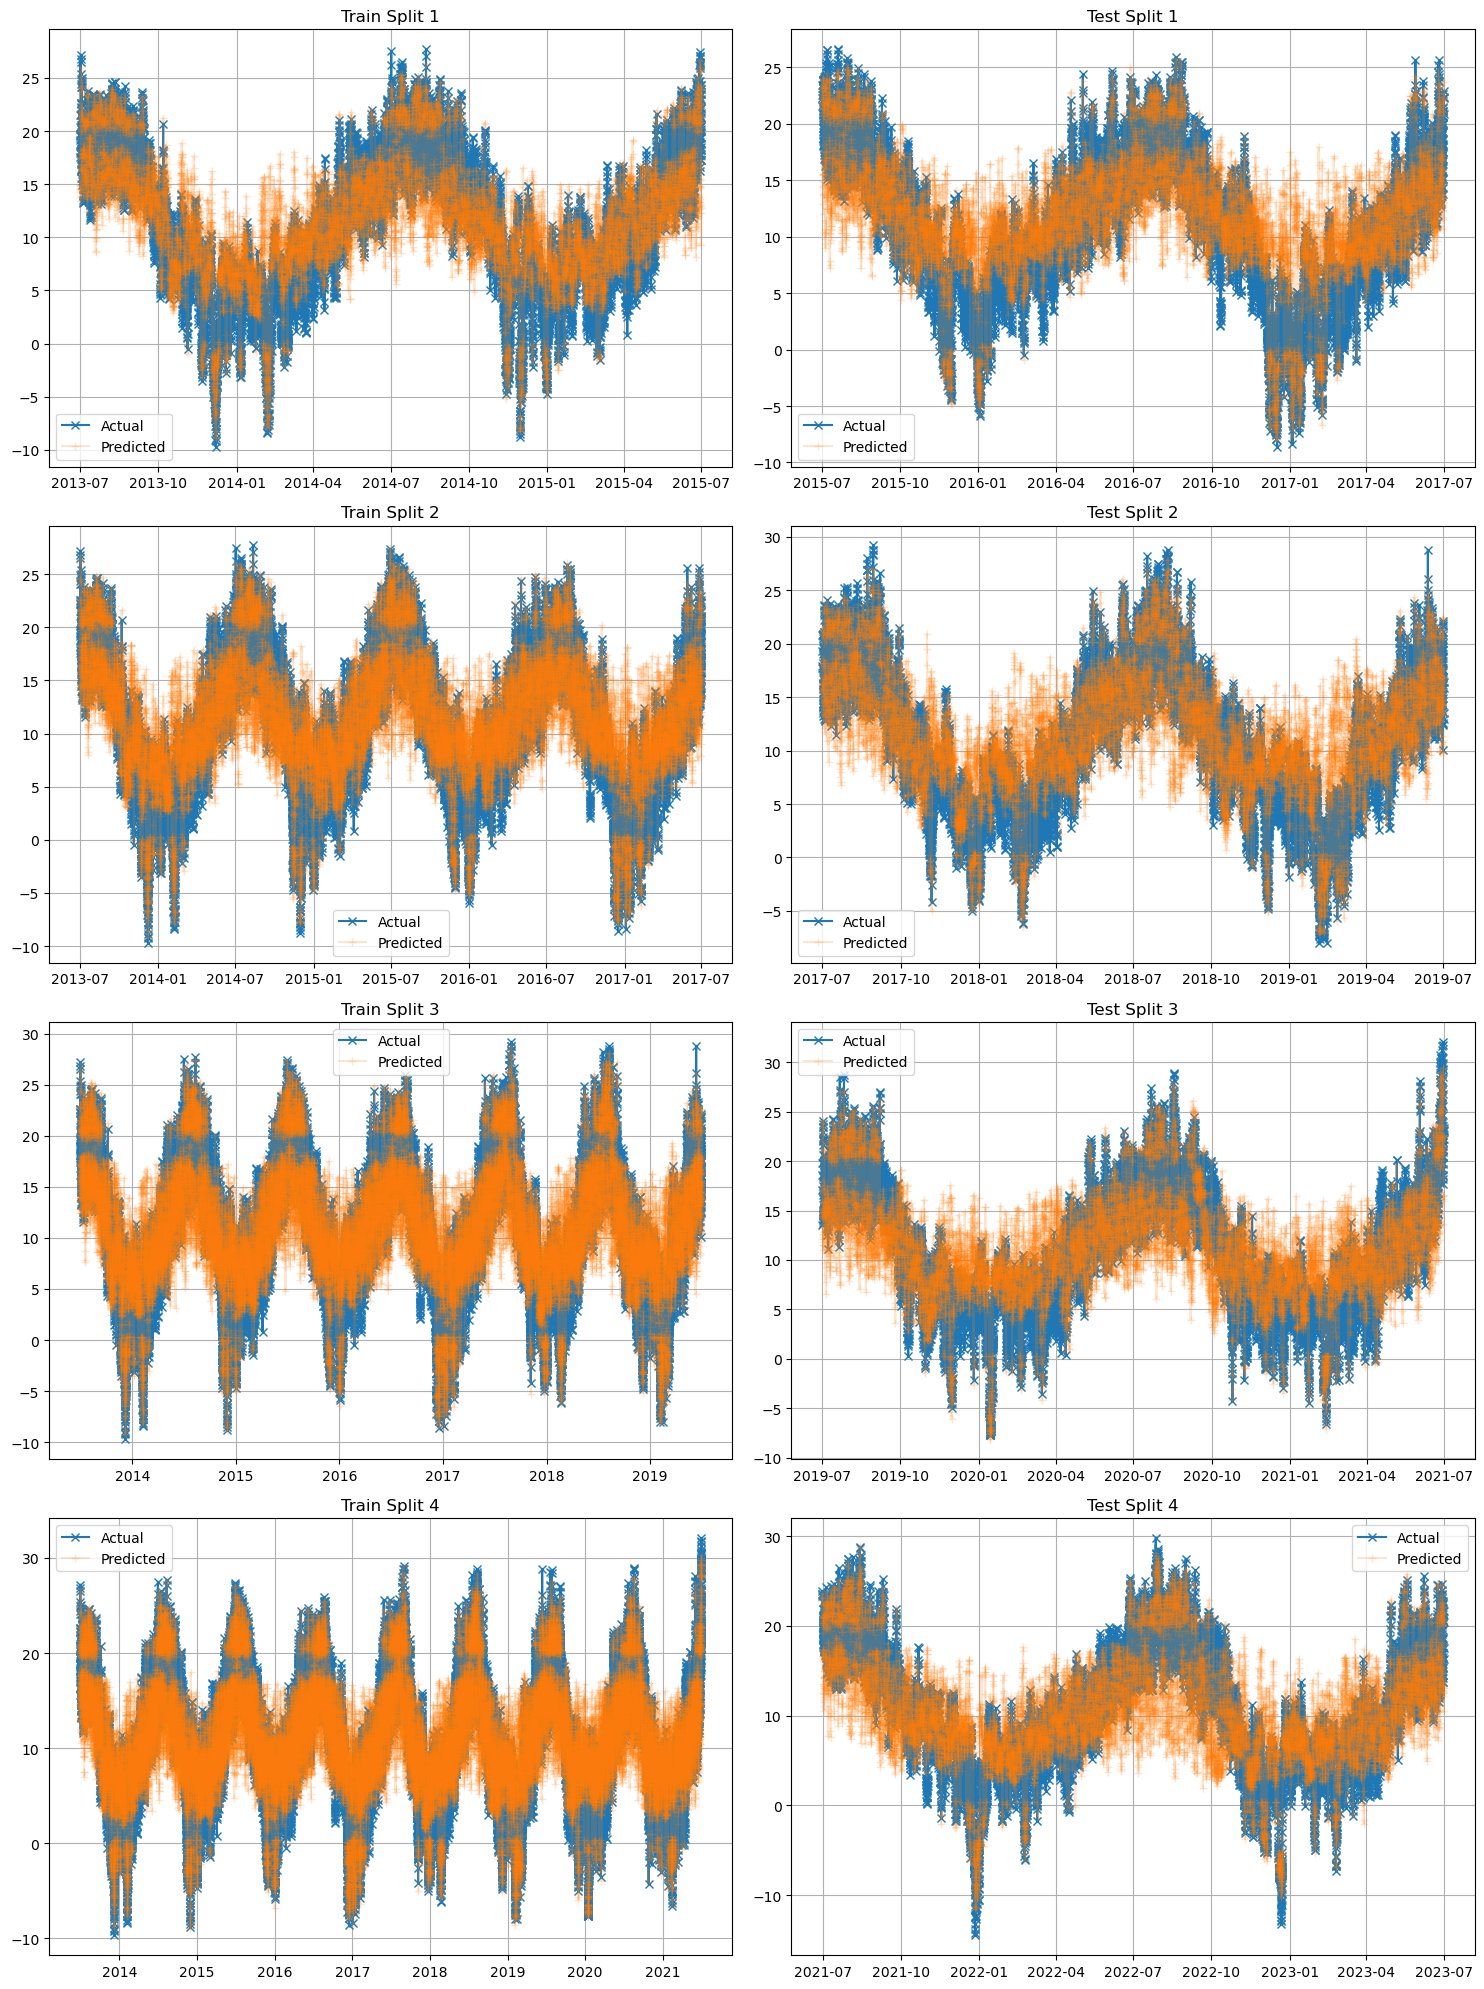

In [28]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()  # flatten the 2D array to 1D for easier indexing

# Assuming these are your dataframes
train_dfs = [train_df1, train_df2, train_df3, train_df4]
test_dfs = [test_df1, test_df2, test_df3, test_df4]

# Pair train and test dataframes for each split
paired_dfs = [(train, test) for train, test in zip(train_dfs, test_dfs)]

# Loop through the train and test dataframes
for i, (train_df, test_df) in enumerate(paired_dfs):
    # Plot the train dataframe
    if 'Predicted_Train' in train_df.columns and 'Actual_Train' in train_df.columns:
        axes[2*i].plot(train_df.index, train_df['Actual_Train'], label='Actual', marker='x')
        axes[2*i].plot(train_df.index, train_df['Predicted_Train'], label='Predicted', marker='+', alpha = 0.2)
        axes[2*i].set_title(f'Train Split {i+1}')
        axes[2*i].legend()
        axes[2*i].grid(True)
    
    # Plot the test dataframe
    if 'Predicted_Test' in test_df.columns and 'Actual_Test' in test_df.columns:
        axes[2*i + 1].plot(test_df.index, test_df['Actual_Test'], label='Actual', marker='x')
        axes[2*i + 1].plot(test_df.index, test_df['Predicted_Test'], label='Predicted', marker='+', alpha = 0.2)
        axes[2*i + 1].set_title(f'Test Split {i+1}')
        axes[2*i + 1].legend()
        axes[2*i + 1].grid(True)

plt.tight_layout()
plt.show()


### We will try to use MinMaxScaling instead of StandardScaling to see if the model improves.

In [70]:
model_7_X = df.drop(['max_air_temp_pst1hr', 'min_air_temp_pst1hr', 'temperature', 'pressure_sea', 'wind_dir', 'dew_point'], axis=1)
model_7_y = df['temperature']

In [72]:
# Initialize TimeSeriesSplit with 4 splits
tscv = TimeSeriesSplit(n_splits=4)

# Define LSTM model
model_7 = Sequential()
model_7.add(InputLayer(input_shape=(1, 9)))  # Replace with the actual shape of your data (timesteps, features)
model_7.add(LSTM(128))
model_7.add(Dense(8, activation='relu'))
model_7.add(Dense(1, activation='linear'))

model_7.summary()

# Loop through splits
for split_num, (train_index, test_index) in enumerate(tscv.split(model_7_X), start=1):
    X_train, X_test = model_7_X.iloc[train_index], model_7_X.iloc[test_index]
    y_train, y_test = model_7_y.iloc[train_index], model_7_y.iloc[test_index]

    # Fit and transform the scaler on training data
    minmax_scaler = MinMaxScaler()
    X_train_scaled = minmax_scaler.fit_transform(X_train)
    X_test_scaled = minmax_scaler.transform(X_test)

    # Reshape your data for LSTM
    # Assuming here that your time steps = 6 and number of features = 5
    X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, 9))
    X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, 9))

    # Compile and fit LSTM model
    model_7.compile(optimizer='adam', loss='mse')
    model_7.fit(X_train_reshaped, y_train, epochs=25, batch_size=32, verbose=0)  # Modify epochs and batch_size as needed

    # Make predictions
    y_train_pred = model_7.predict(X_train_reshaped)
    y_test_pred = model_7.predict(X_test_reshaped)

    train_start_date = X_train.index.min()
    train_end_date = X_train.index.max()
    test_start_date = X_test.index.min()
    test_end_date = X_test.index.max()
    
    # Evaluate on training data
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    # Output evaluation metrics and other details
    print(f"Split {split_num}:")
    print(f"Training data date range: {train_start_date} to {train_end_date}")
    print(f"Train MAE: {train_mae}")
    print(f"Train MSE: {train_mse}")
    print(f"Train RMSE: {train_rmse}")
    print(f"Train R^2: {train_r2}")
    print()
    
    # Evaluate on test data
    train_mae = mean_absolute_error(y_test, y_test_pred)
    train_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_test, y_test_pred)

    # Output evaluation metrics and other details
    print(f"Split {split_num}:")
    print(f"Test data date range: {test_start_date} to {test_end_date}")
    print(f"Test MAE: {train_mae}")
    print(f"Test MSE: {train_mse}")
    print(f"Test RMSE: {train_rmse}")
    print(f"Test R^2: {train_r2}")
    print()

    # You can also evaluate on the test set if you wish

Model: "sequential_274"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_274 (LSTM)              (None, 128)               70656     
_________________________________________________________________
dense_548 (Dense)            (None, 8)                 1032      
_________________________________________________________________
dense_549 (Dense)            (None, 1)                 9         
Total params: 71,697
Trainable params: 71,697
Non-trainable params: 0
_________________________________________________________________
Split 1:
Training data date range: 2013-07-01 00:00:00 to 2015-07-01 11:00:00
Train MAE: 2.827848388894818
Train MSE: 13.419675977766397
Train RMSE: 3.6632875914629466
Train R^2: 0.6626628073876899

Split 1:
Test data date range: 2015-07-01 12:00:00 to 2017-06-30 20:00:00
Test MAE: 2.9942929737508335
Test MSE: 14.923931390276602
Test RMSE: 3.863150448827563
Test R^2: 0.608798

The model performs significanlty worse with MinMax Scaling.

# Summarize other models here. Then indicate model_6 and fb prophet are the best choice so far so we will need to optimize them.

In [105]:
def create_model(neurons=64, activation='relu', recurrent_regularizer_value=0.01):
    model = Sequential()
    model.add(InputLayer(input_shape=(1, 9)))  # 1 timestep, 9 features
    model.add(LSTM(neurons, recurrent_regularizer=l2(recurrent_regularizer_value)))  # Using l2 regularizer here
    model.add(Dense(8, activation=activation))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [106]:
class ReshapeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, new_shape):
        self.new_shape = new_shape

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.reshape(X, (self.new_shape))

In [107]:
model = KerasRegressor(build_fn=create_model, epochs=25, batch_size=32, verbose=0)

# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('reshaper', ReshapeTransformer(new_shape=(-1, 1, 9))))
estimators.append(('mlp', model))
pipeline = Pipeline(estimators)

# time series cross-validator
tscv = TimeSeriesSplit(n_splits=4)

In [108]:
param_grid = {
    'mlp__neurons': [32, 64, 128],
    'mlp__recurrent_regularizer_value': [0.01, 0.001, 0.0001],  # These will be passed to the l2 regularizer
    'mlp__batch_size': [32, 64],
}

In [ ]:
grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=tscv, verbose=1)
grid_result = grid.fit(model_6_X, model_6_y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 4 folds for each of 18 candidates, totalling 72 fits


Comparison here was between relu/tanh activation, 32/64 batch size, and 32/64/128 neurons:
</br>
Fitting 4 folds for each of 12 candidates, totalling 48 fits
</br>
Best: -13.986520 using {'mlp__activation': 'relu', 'mlp__batch_size': 32, 'mlp__neurons': 128}

In [77]:
# Initialize TimeSeriesSplit with 4 splits
tscv = TimeSeriesSplit(n_splits=4)

# Define LSTM model
model_6 = Sequential()
model_6.add(InputLayer(input_shape=(1, 9)))  # Replace with the actual shape of your data (timesteps, features)
model_6.add(LSTM(128, recurrent_regularizer=l2(0.01)))
model_6.add(Dense(8, activation='relu'))
model_6.add(Dense(1, activation='linear'))

model_6.summary()

# Initialize empty dictionary to store DataFrames for each split
split_data_frames = {}

# Loop through splits
for split_num, (train_index, test_index) in enumerate(tscv.split(model_6_X), start=1):
    X_train, X_test = model_6_X.iloc[train_index], model_6_X.iloc[test_index]
    y_train, y_test = model_6_y.iloc[train_index], model_6_y.iloc[test_index]

    # Fit and transform the scaler on training data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Reshape your data for LSTM
    # Assuming here that your time steps = 6 and number of features = 5
    X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, 9))
    X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, 9))

    # Compile and fit LSTM model
    model_6.compile(optimizer='adam', loss='mse')
    model_6.fit(X_train_reshaped, y_train, epochs=25, batch_size=32, verbose=0)  # Modify epochs and batch_size as needed

    # Make predictions
    y_train_pred = model_6.predict(X_train_reshaped)
    y_test_pred = model_6.predict(X_test_reshaped)

    # Create DataFrame for this split's train data
    train_df = pd.DataFrame({
        'Date': X_train.index,
        'Predicted_Train': y_train_pred.flatten(),
        'Actual_Train': y_train.values
    }).set_index('Date')
    
    # Create DataFrame for this split's test data
    test_df = pd.DataFrame({
        'Date': X_test.index,
        'Predicted_Test': y_test_pred.flatten(),
        'Actual_Test': y_test.values
    }).set_index('Date')

    # Store in dictionary
    split_data_frames[f'Split_{split_num}'] = {
        'Train': train_df,
        'Test': test_df
    }
    
    # Define the start and end date for each split.
    train_start_date = X_train.index.min()
    train_end_date = X_train.index.max()
    test_start_date = X_test.index.min()
    test_end_date = X_test.index.max()
    
    # Evaluate on training data
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    # Output evaluation metrics and other details
    print(f"Split {split_num}:")
    print(f"Training data date range: {train_start_date} to {train_end_date}")
    print(f"Train MAE: {train_mae}")
    print(f"Train MSE: {train_mse}")
    print(f"Train RMSE: {train_rmse}")
    print(f"Train R^2: {train_r2}")
    print()
    
    # Evaluate on test data
    train_mae = mean_absolute_error(y_test, y_test_pred)
    train_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_test, y_test_pred)

    # Output evaluation metrics and other details
    print(f"Split {split_num}:")
    print(f"Test data date range: {test_start_date} to {test_end_date}")
    print(f"Test MAE: {train_mae}")
    print(f"Test MSE: {train_mse}")
    print(f"Test RMSE: {train_rmse}")
    print(f"Test R^2: {train_r2}")
    print()

    # You can also evaluate on the test set if you wish

Model: "sequential_277"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_277 (LSTM)              (None, 128)               70656     
_________________________________________________________________
dense_550 (Dense)            (None, 8)                 1032      
_________________________________________________________________
dense_551 (Dense)            (None, 1)                 9         
Total params: 71,697
Trainable params: 71,697
Non-trainable params: 0
_________________________________________________________________
Split 1:
Training data date range: 2013-07-01 00:00:00 to 2015-07-01 11:00:00
Train MAE: 2.433549222825407
Train MSE: 10.564273845193748
Train RMSE: 3.250272887803999
Train R^2: 0.7344404971603147

Split 1:
Test data date range: 2015-07-01 12:00:00 to 2017-06-30 20:00:00
Test MAE: 2.7611274267400456
Test MSE: 13.251575932571273
Test RMSE: 3.640271409190704
Test R^2: 0.6526362